In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import pydotplus
from IPython.display import Image

**reading data**

In [3]:
df = pd.read_csv('obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [4]:
#convert weight column value in df to pounds & convert height column value in df to inches

df['Weight'] = df['Weight'] * 2.20462
df['Height'] = df['Height'] * 0.393701

In [5]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,68.336754,158.693069,23.891783,4,Normal weight
1,69,Male,64.617084,198.325974,33.395209,2,Obese
2,46,Female,66.170194,160.784324,25.817737,4,Overweight
3,32,Male,66.322726,187.143385,29.912247,3,Overweight
4,60,Male,72.271129,152.204640,20.487903,3,Normal weight


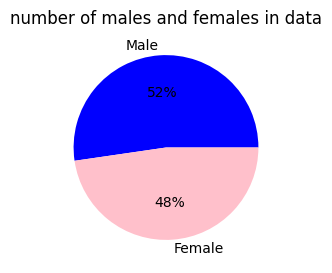

In [6]:
df2=df['Gender'].value_counts().reset_index(name='genders')
plt.figure(figsize = (3,3))
plt.pie(df2['genders'], labels=['Male','Female'], colors=["blue","pink"], autopct='%.0f%%')
plt.title('number of males and females in data')
plt.show()

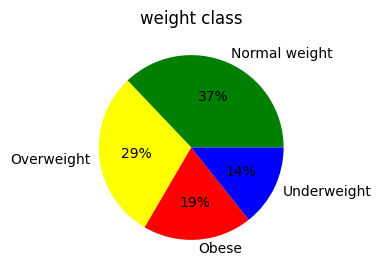

In [7]:
df3=df['ObesityCategory'].value_counts().reset_index(name='obesity')
plt.figure(figsize = (3,3))
plt.pie(df3['obesity'], labels=['Normal weight','Overweight','Obese','Underweight'], colors=["green","yellow","red","blue"], autopct='%.0f%%')
plt.title('weight class')
plt.show()

# **MALE ONLY VIEW**

In [8]:
df_male_view = df[df['Gender'] == 'Male']
df_male_view.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,68.336754,158.693069,23.891783,4,Normal weight
1,69,Male,64.617084,198.325974,33.395209,2,Obese
3,32,Male,66.322726,187.143385,29.912247,3,Overweight
4,60,Male,72.271129,152.204640,20.487903,3,Normal weight
6,78,Male,72.270249,203.284749,27.364341,3,Overweight


In [9]:
# rounding height and weight column in df_male_view to the nearest integer
df_male_view['Weight'] = round(df_male_view['Weight'],0)
df_male_view['Height'] = round(df_male_view['Height'],0)
df_male_view.head()

<ipython-input-9-0eac4133fe5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male_view['Weight'] = round(df_male_view['Weight'],0)
<ipython-input-9-0eac4133fe5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male_view['Height'] = round(df_male_view['Height'],0)


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,68.0,159.0,23.891783,4,Normal weight
1,69,Male,65.0,198.0,33.395209,2,Obese
3,32,Male,66.0,187.0,29.912247,3,Overweight
4,60,Male,72.0,152.0,20.487903,3,Normal weight
6,78,Male,72.0,203.0,27.364341,3,Overweight


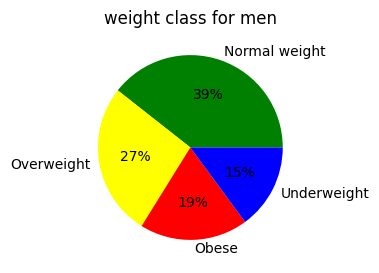

In [10]:
df_male_view_chart=df_male_view['ObesityCategory'].value_counts().reset_index(name='obesity')
plt.figure(figsize = (3,3))
plt.pie(df_male_view_chart['obesity'], labels=['Normal weight','Overweight','Obese','Underweight'], colors=["green","yellow","red","blue"], autopct='%.0f%%')
plt.title('weight class for men')
plt.show()

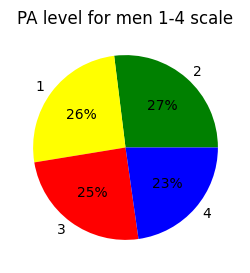

In [11]:
df_male_view_chart2=df_male_view['PhysicalActivityLevel'].value_counts().reset_index(name='PA')
plt.figure(figsize = (3,3))
plt.pie(df_male_view_chart2['PA'], labels=['2','1','3','4'], colors=["green","yellow","red","blue"], autopct='%.0f%%')
plt.title('PA level for men 1-4 scale')
plt.show()

In [19]:
Highly_active_males = df_male_view[df_male_view['PhysicalActivityLevel'] == 4]

moderately_active_males = df_male_view[df_male_view['PhysicalActivityLevel'] == 3]

low_active_males = df_male_view[df_male_view['PhysicalActivityLevel'] == 2]

no_active_males = df_male_view[df_male_view['PhysicalActivityLevel'] == 1]

In [34]:
# group age column in df_male_view

import pandas as pd
df_male_view['AgeGroups'] = pd.cut(df_male_view['Age'], bins=[18, 24, 34, 44, 54, 64, 74, 84, 94], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94'])


<ipython-input-34-7d5e7d20d467>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male_view['AgeGroups'] = pd.cut(df_male_view['Age'], bins=[18, 24, 34, 44, 54, 64, 74, 84, 94], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94'])


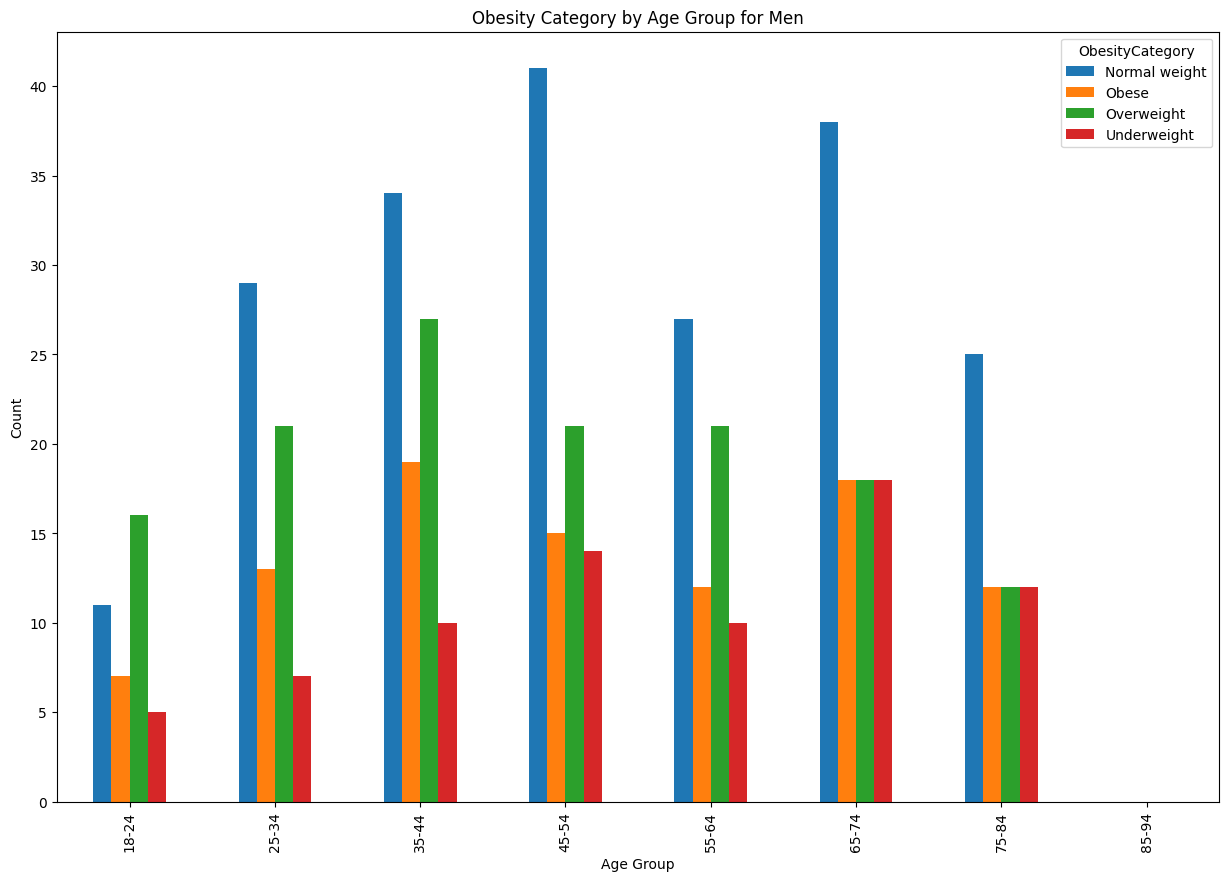

In [36]:
# make a chart of obesitycategory by age

import matplotlib.pyplot as plt
df_male_view.groupby(['AgeGroups', 'ObesityCategory']).size().unstack().plot(kind='bar', figsize=(15, 10))
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.title('Obesity Category by Age Group for Men')
plt.show()


# **WOMEN'S VIEW**

In [20]:
df_female_view = df[df['Gender'] == 'Female']
df_female_view.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
2,46,Female,66.170194,160.784324,25.817737,4,Overweight
5,25,Female,65.514062,134.803403,22.081628,4,Normal weight
11,40,Female,59.008229,115.783027,23.378629,1,Normal weight
17,57,Female,59.431087,114.474777,22.786717,3,Normal weight
19,20,Female,72.396067,190.223223,25.517192,1,Overweight


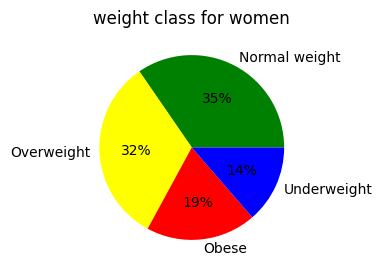

In [27]:
df_female_view_chart=df_female_view['ObesityCategory'].value_counts().reset_index(name='obesity')
plt.figure(figsize = (3,3))
plt.pie(df_female_view_chart['obesity'], labels=['Normal weight','Overweight','Obese','Underweight'], colors=["green","yellow","red","blue"], autopct='%.0f%%')
plt.title('weight class for women')
plt.show()

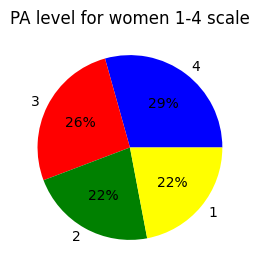

In [38]:
df_female_view_chart2=df_female_view['PhysicalActivityLevel'].value_counts().reset_index(name='PA')
plt.figure(figsize = (3,3))
plt.pie(df_female_view_chart2['PA'], labels=['4','3','2','1'], colors=["blue","red","green","yellow"], autopct='%.0f%%')
plt.title('PA level for women 1-4 scale')
plt.show()

<ipython-input-37-e4930d678e31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_view['AgeGroups'] = pd.cut(df_female_view['Age'], bins=[18, 24, 34, 44, 54, 64, 74, 84, 94], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94'])


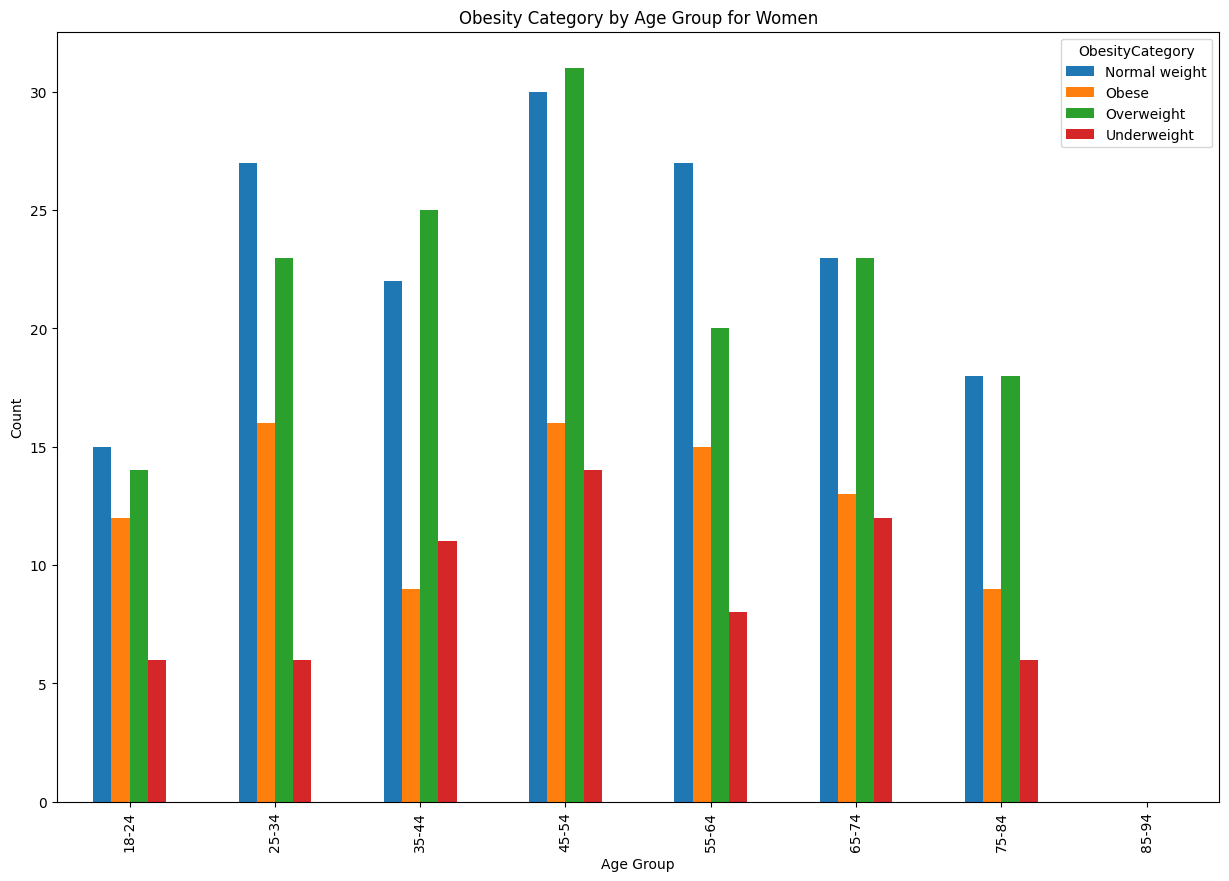

In [37]:
df_female_view['AgeGroups'] = pd.cut(df_female_view['Age'], bins=[18, 24, 34, 44, 54, 64, 74, 84, 94], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94'])
df_female_view.groupby(['AgeGroups', 'ObesityCategory']).size().unstack().plot(kind='bar', figsize=(15, 10))
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.title('Obesity Category by Age Group for Women')
plt.show()